In [1]:
import tensorflow as tf
print(tf.__version__)

2.20.0


## LIBRARIES

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2 # Model
from tensorflow.keras import layers, models

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models

# Parameters
IMAGE_SIZE = (128, 128)
BATCH_SIZE = 64
EPOCHS = 15 # epoch for train models

# Data Generators
train_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    horizontal_flip=True
)

test_gen = ImageDataGenerator(rescale=1./255)

# load data / splitting data
train_data = train_gen.flow_from_directory(
    'dataset_split/train',
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

test_data = test_gen.flow_from_directory(
    'dataset_split/test',
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

# Build Model using Transfer Learning
base_model = MobileNetV2(input_shape=(128, 128, 3), include_top=False, weights='imagenet')
base_model.trainable = False  # Freeze the base model layers initially

# Define the full model matrix form
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(train_data.num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_data, validation_data=test_data, epochs=EPOCHS)

Found 925 images belonging to 4 classes.
Found 325 images belonging to 4 classes.
Epoch 1/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 16s 686ms/step - accuracy: 0.6054 - loss: 1.0379 - val_accuracy: 0.8708 - val_loss: 0.3979
Epoch 2/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 8s 542ms/step - accuracy: 0.8022 - loss: 0.5235 - val_accuracy: 0.9015 - val_loss: 0.2667
Epoch 3/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 8s 546ms/step - accuracy: 0.8789 - loss: 0.3357 - val_accuracy: 0.9231 - val_loss: 0.2127
Epoch 4/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 8s 528ms/step - accuracy: 0.8800 - loss: 0.3416 - val_accuracy: 0.9446 - val_loss: 0.1868
Epoch 5/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 8s 534ms/step - accuracy: 0.8995 - loss: 0.2913 - val_accuracy: 0.9508 - val_loss: 0.1760
Epoch 6/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 8s 554ms/step - accuracy: 0.9070 - loss: 0.2629 - val_accuracy: 0.9477 - val_loss: 0.1607
Epoch 7/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 8s 567ms/step - accuracy: 0.9146 - loss: 0.2161 - val_accuracy: 0.9538 - val_loss: 0.1560
Epoch 8/15
15/15 ━━━━

## MODEL EVALUATION ##

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 200ms/step


<Figure size 800x600 with 0 Axes>

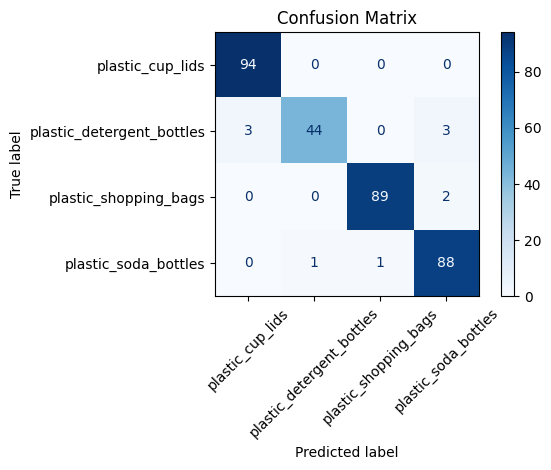

Classification Report:

                           precision    recall  f1-score   support

         plastic_cup_lids       0.97      1.00      0.98        94
plastic_detergent_bottles       0.98      0.88      0.93        50
    plastic_shopping_bags       0.99      0.98      0.98        91
     plastic_soda_bottles       0.95      0.98      0.96        90

                 accuracy                           0.97       325
                macro avg       0.97      0.96      0.96       325
             weighted avg       0.97      0.97      0.97       325



In [5]:
# Predict the classes on test data
pred_probs = model.predict(test_data)
pred_labels = np.argmax(pred_probs, axis=1)

# Get true labels and class names
true_labels = test_data.classes
class_names = list(test_data.class_indices.keys())

# Generate confusion matrix
cm = confusion_matrix(true_labels, pred_labels)

# Display confusion matrix
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Confusion Matrix")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Classification report
report = classification_report(true_labels, pred_labels, target_names=class_names)
print("Classification Report:\n")
print(report)